<a href="https://colab.research.google.com/github/Manohar4587/Gun_Object_Detection/blob/main/October.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 9.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
os.chdir('/content/drive/MyDrive/Gun_Object_Detection-main 2')

In [4]:
import json
import os
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

# Function to convert bounding box from (x, y, width, height) to YOLO format (x_center, y_center, width, height)
def convert_to_yolo_format(size, box):
    dw = 1. / size[0]  # width of the image
    dh = 1. / size[1]  # height of the image
    x_center = box['x'] + (box['width'] / 2.0)
    y_center = box['y'] + (box['height'] / 2.0)
    w = box['width']
    h = box['height']

    # Normalize and ensure within bounds [0, 1]
    x_center = max(0, min(1, x_center * dw))
    y_center = max(0, min(1, y_center * dh))
    w = max(0, min(1, w * dw))
    h = max(0, min(1, h * dh))

    return (x_center, y_center, w, h)

# Function to visualize YOLO bounding boxes
def visualize_bbox(image_path, yolo_box, size):
    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    # Unnormalize YOLO format to image pixel coordinates
    x_center, y_center, bbox_width, bbox_height = yolo_box
    x_center, y_center, bbox_width, bbox_height = x_center * w, y_center * h, bbox_width * w, bbox_height * h
    x1 = int(x_center - (bbox_width / 2))
    y1 = int(y_center - (bbox_height / 2))
    x2 = int(x_center + (bbox_width / 2))
    y2 = int(y_center + (bbox_height / 2))

    # Draw rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show image with bounding box
    cv2_imshow(img)

# Load your JSON annotation file
json_file = '/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/train/gun_train_update_annot.json'

# Output directories for YOLO annotations and images
output_dir_labels = 'path_to_yolo_labels1/'
output_dir_images = '/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/train'
os.makedirs(output_dir_labels, exist_ok=True)

# Open and read the JSON file
with open(json_file, 'r') as f:
    data = json.load(f)

# Iterate over the entries in the JSON file
for img_key, img_data in data.items():
    filename = img_data['filename']
    image_path = os.path.join(output_dir_images, filename)

    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue  # Skip this image if it's not found

    with Image.open(image_path) as img:
        width, height = img.size  # Automatically get the image width and height

    # Prepare the YOLO format annotation file
    label_file = os.path.join(output_dir_labels, f"{os.path.splitext(filename)[0]}.txt")

    # Open the label file for writing
    with open(label_file, 'w') as lf:
        # Iterate over the regions (bounding boxes)
        for region in img_data['regions']:
            try:
                box = region['shape_attributes']
                yolo_box = convert_to_yolo_format((width, height), box)
                lf.write(f"0 {' '.join(map(str, yolo_box))}\n")

                # Visualize bounding box on the image (optional)
                #visualize_bbox(image_path, yolo_box, (width, height))
            except KeyError as e:
                print(f"KeyError: {e} in {filename}")
                continue  # Skip if there's an error



In [5]:
import json
import os
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

# Function to convert bounding box from (x, y, width, height) to YOLO format (x_center, y_center, width, height)
def convert_to_yolo_format(size, box):
    dw = 1. / size[0]  # width of the image
    dh = 1. / size[1]  # height of the image
    x_center = box['x'] + (box['width'] / 2.0)
    y_center = box['y'] + (box['height'] / 2.0)
    w = box['width']
    h = box['height']

    # Normalize and ensure within bounds [0, 1]
    x_center = max(0, min(1, x_center * dw))
    y_center = max(0, min(1, y_center * dh))
    w = max(0, min(1, w * dw))
    h = max(0, min(1, h * dh))

    return (x_center, y_center, w, h)

# Function to visualize YOLO bounding boxes
def visualize_bbox(image_path, yolo_box, size):
    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    # Unnormalize YOLO format to image pixel coordinates
    x_center, y_center, bbox_width, bbox_height = yolo_box
    x_center, y_center, bbox_width, bbox_height = x_center * w, y_center * h, bbox_width * w, bbox_height * h
    x1 = int(x_center - (bbox_width / 2))
    y1 = int(y_center - (bbox_height / 2))
    x2 = int(x_center + (bbox_width / 2))
    y2 = int(y_center + (bbox_height / 2))

    # Draw rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show image with bounding box
    cv2_imshow(img)

# Load your JSON annotation file
json_file = '/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/val/Gun_val_annot_update.json'
# Output directories for YOLO annotations and images
output_dir_labels = 'path_to_yolo_labels2/'
output_dir_images = '/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/val'
os.makedirs(output_dir_labels, exist_ok=True)

# Open and read the JSON file
with open(json_file, 'r') as f:
    data = json.load(f)

# Iterate over the entries in the JSON file
for img_key, img_data in data.items():
    filename = img_data['filename']
    image_path = os.path.join(output_dir_images, filename)

    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue  # Skip this image if it's not found

    with Image.open(image_path) as img:
        width, height = img.size  # Automatically get the image width and height

    # Prepare the YOLO format annotation file
    label_file = os.path.join(output_dir_labels, f"{os.path.splitext(filename)[0]}.txt")

    # Open the label file for writing
    with open(label_file, 'w') as lf:
        # Iterate over the regions (bounding boxes)
        for region in img_data['regions']:
            try:
                box = region['shape_attributes']
                yolo_box = convert_to_yolo_format((width, height), box)
                lf.write(f"0 {' '.join(map(str, yolo_box))}\n")

                # Visualize bounding box on the image (optional)
                #visualize_bbox(image_path, yolo_box, (width, height))
            except KeyError as e:
                print(f"KeyError: {e} in {filename}")
                continue  # Skip if there's an error



In [6]:
from ultralytics import YOLO

# Load a YOLOv8 model (pretrained)
model = YOLO('yolov8s.pt')  # Switch to 'yolov8s.pt' for better accuracy with a small dataset

# Train the model on the custom dataset
results = model.train(
    data='/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/data.yaml',  # path to the data yaml file
    epochs=35,  # Increased epochs for more training time
    imgsz=640,  # Reduced image size for stability
    batch=16,   # Increase batch size if hardware allows
    name='gun-detection',
    optimizer='AdamW',  # Use AdamW for stable convergence
    lr0=0.001,  # Lower learning rate for gradual training
    device='cpu'  # or 'gpu' if available
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=gun-detection35, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, v

100%|██████████| 755k/755k [00:00<00:00, 10.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/labels/train.cache... 247 images, 1 backgrounds, 4 corrupt: 100%|██████████| 248/248 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/train/Img189.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015]
train: WARNING ⚠️ /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/train/Img190.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2993]
train: WARNING ⚠️ /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/train/Img244.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0366]
train: WARNING ⚠️ /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/train/Img249.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0605]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/labels/val.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to runs/detect/gun-detection35/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/gun-detection35
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35         0G      3.741      6.451      2.656          7        640: 100%|██████████| 16/16 [10:34<00:00, 39.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.03s/it]

                   all         45         53          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35         0G      3.473      4.247      2.302         10        640: 100%|██████████| 16/16 [09:29<00:00, 35.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.46s/it]

                   all         45         53   0.000473      0.113   0.000267   5.38e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35         0G      3.329      3.978      2.242         10        640: 100%|██████████| 16/16 [09:25<00:00, 35.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.94s/it]

                   all         45         53   0.000361     0.0377   0.000191   1.91e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35         0G       3.46       3.98      2.233         10        640: 100%|██████████| 16/16 [09:23<00:00, 35.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.87s/it]

                   all         45         53   0.000386     0.0943   0.000257   6.62e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35         0G      3.299      3.853      2.196          9        640: 100%|██████████| 16/16 [09:24<00:00, 35.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.44s/it]

                   all         45         53   0.000667       0.17   0.000559   0.000155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35         0G      3.275      3.858      2.214          8        640: 100%|██████████| 16/16 [09:18<00:00, 34.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.52s/it]

                   all         45         53   0.000595      0.151   0.000411   7.05e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35         0G      3.349      3.816      2.256          5        640: 100%|██████████| 16/16 [09:22<00:00, 35.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.58s/it]

                   all         45         53   0.000844      0.208   0.000752   0.000145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35         0G      3.342      3.866      2.166          7        640: 100%|██████████| 16/16 [09:17<00:00, 34.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.56s/it]

                   all         45         53    0.00098     0.0189   0.000533   0.000124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35         0G      3.351      3.898      2.188          5        640: 100%|██████████| 16/16 [09:26<00:00, 35.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.68s/it]

                   all         45         53    0.00065     0.0943   0.000375   8.54e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35         0G      3.179      3.711      2.144          9        640: 100%|██████████| 16/16 [09:18<00:00, 34.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.96s/it]

                   all         45         53   0.000448      0.113   0.000287   7.86e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35         0G      3.286      3.654      2.175          8        640: 100%|██████████| 16/16 [09:23<00:00, 35.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.58s/it]

                   all         45         53   0.000889      0.226    0.00061   0.000134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35         0G      3.185      3.557      2.148          8        640: 100%|██████████| 16/16 [09:20<00:00, 35.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.36s/it]

                   all         45         53   0.000815      0.208   0.000525   0.000176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35         0G      3.075       3.51      2.059          8        640: 100%|██████████| 16/16 [09:25<00:00, 35.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.53s/it]

                   all         45         53   0.000976      0.245   0.000694   0.000202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35         0G       2.97      3.464      2.057          6        640: 100%|██████████| 16/16 [09:20<00:00, 35.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.66s/it]

                   all         45         53    0.00144     0.0189   0.000445    0.00011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35         0G      3.007      3.462      2.089          9        640: 100%|██████████| 16/16 [09:20<00:00, 35.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.53s/it]

                   all         45         53   0.000759       0.17    0.00156   0.000332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35         0G      2.948      3.319      2.062          8        640: 100%|██████████| 16/16 [09:21<00:00, 35.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.56s/it]

                   all         45         53   0.000907      0.189   0.000724   0.000177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35         0G      2.933      3.216      2.069          7        640: 100%|██████████| 16/16 [09:05<00:00, 34.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.78s/it]

                   all         45         53   0.000942      0.208    0.00104   0.000199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35         0G      2.833      3.082      2.015          6        640: 100%|██████████| 16/16 [09:09<00:00, 34.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.02s/it]

                   all         45         53    0.00706     0.0377    0.00101   0.000256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35         0G      2.813      3.214      1.904          6        640: 100%|██████████| 16/16 [09:35<00:00, 35.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.79s/it]

                   all         45         53   0.000825      0.208    0.00136   0.000413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35         0G      2.722      3.064      1.937         12        640: 100%|██████████| 16/16 [09:03<00:00, 33.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.11s/it]

                   all         45         53     0.0012      0.151     0.0012   0.000372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35         0G      2.742      3.068      1.979          5        640: 100%|██████████| 16/16 [09:00<00:00, 33.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.52s/it]

                   all         45         53     0.0127     0.0189    0.00227   0.000632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35         0G      2.769      3.155       1.96          3        640: 100%|██████████| 16/16 [09:02<00:00, 33.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.23s/it]

                   all         45         53    0.00084      0.189    0.00175   0.000582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35         0G      2.668      2.895      1.906          7        640: 100%|██████████| 16/16 [08:59<00:00, 33.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.59s/it]

                   all         45         53    0.00102      0.208    0.00292   0.000545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35         0G      2.736      2.933      1.931          6        640: 100%|██████████| 16/16 [10:25<00:00, 39.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.44s/it]

                   all         45         53    0.00132       0.17    0.00252   0.000354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35         0G      2.672      2.819      1.974          4        640: 100%|██████████| 16/16 [10:18<00:00, 38.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.56s/it]

                   all         45         53     0.0011      0.151    0.00119    0.00024


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35         0G      2.578      3.007      1.964          4        640: 100%|██████████| 16/16 [10:18<00:00, 38.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.99s/it]

                   all         45         53     0.0012      0.208    0.00106   0.000205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35         0G      2.594       2.85      2.013          4        640: 100%|██████████| 16/16 [10:16<00:00, 38.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.79s/it]

                   all         45         53    0.00258     0.0377    0.00127   0.000273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35         0G      2.517      2.702      2.011          4        640: 100%|██████████| 16/16 [10:18<00:00, 38.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.14s/it]

                   all         45         53     0.0261     0.0189    0.00227   0.000506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35         0G      2.412       2.62      1.864          5        640: 100%|██████████| 16/16 [10:19<00:00, 38.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.82s/it]

                   all         45         53    0.00206     0.0566   0.000943   0.000202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35         0G      2.361      2.552      1.831          7        640: 100%|██████████| 16/16 [10:18<00:00, 38.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.72s/it]

                   all         45         53   0.000929      0.208   0.000677   0.000165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35         0G      2.333      2.392       1.82          4        640: 100%|██████████| 16/16 [10:06<00:00, 37.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.27s/it]

                   all         45         53   0.000901       0.17   0.000832   0.000158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35         0G      2.249      2.425      1.797          4        640: 100%|██████████| 16/16 [10:06<00:00, 37.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.10s/it]

                   all         45         53    0.00146      0.226    0.00135   0.000268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35         0G      2.115       2.24      1.775          6        640: 100%|██████████| 16/16 [10:13<00:00, 38.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.26s/it]

                   all         45         53    0.00126      0.189    0.00146   0.000342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35         0G      2.119      2.199      1.783          4        640: 100%|██████████| 16/16 [10:14<00:00, 38.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.19s/it]

                   all         45         53    0.00124      0.189    0.00167    0.00034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35         0G       2.12      2.199      1.732          4        640: 100%|██████████| 16/16 [10:14<00:00, 38.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.55s/it]

                   all         45         53     0.0013      0.189    0.00162   0.000344



35 epochs completed in 5.897 hours.
Optimizer stripped from runs/detect/gun-detection35/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/gun-detection35/weights/best.pt, 22.5MB

Validating runs/detect/gun-detection35/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.64s/it]


                   all         45         53     0.0128     0.0189    0.00228   0.000632
Speed: 1.8ms preprocess, 626.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/gun-detection35



image 1/3 /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images/Img60.jpg: 288x640 1 person, 1 remote, 321.8ms
image 2/3 /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images/Img82.jpg: 288x640 3 persons, 1 tie, 1 remote, 308.8ms
image 3/3 /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images/Img88.jpg: 288x640 2 persons, 1 cell phone, 302.7ms
Speed: 2.6ms preprocess, 311.1ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)


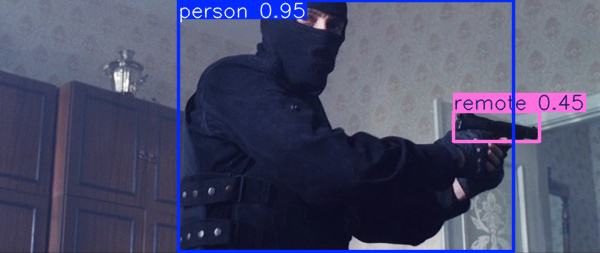

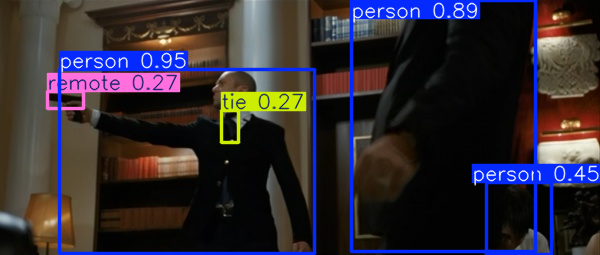

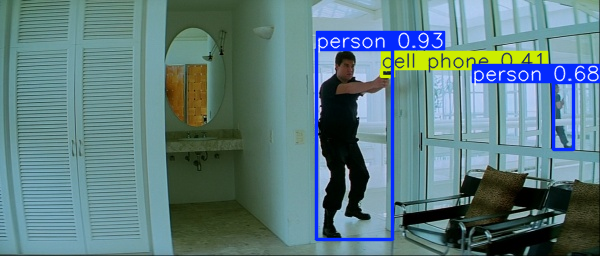

In [8]:
from ultralytics import YOLO
# Load the trained YOLOv8 model (replace 'best.pt' with your actual model weights if different)
model = YOLO('runs/detect/gun-detection/weights/yolov8s.pt')  # Path to your trained model weights

# Perform inference on an image
results = model('/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images', conf=0.25)

# Display the results
#results.show()  # Display the image with bounding boxes

# Check if results is a list
if isinstance(results, list):
    for result in results:
        result.show()  # Show each result if it's a list
else:
    results.show()  # Show the single result if it's not a list


# Optionally, save the results
#results.save('/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images/Img88.jpg')  # Save the results in an output folder

# If you want to get detailed information about detections:
#print(results.pandas().xyxy[0])  # Print the bounding box information
